In [ ]:

# Colin Fenwick
# EXASENS COPD Dataset

In [ ]:
# Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Part 1 - Data Loading and Cleaning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
copd_df = pd.read_excel('/content/drive/My Drive/HI2454/exasensmodified.xlsx')
copd_df

,Diagnosis,ID,imaginary_min,imaginary_avg,real_min,real_avg,Gender,Age,Smoking
0,COPD,301-4,-320.61,-300.563531,-495.26,-464.171991,1,77,2
1,COPD,302-3,-325.39,-314.750359,-473.73,-469.263140,0,72,2
2,COPD,303-3,-323.00,-317.436056,-476.12,-471.897667,1,73,3
3,COPD,304-4,-327.78,-317.399670,-473.73,-468.856388,1,76,2
4,COPD,305-4,-325.39,-316.155785,-478.52,-472.869783,0,65,2
...,...,...,...,...,...,...,...,...,...
394,Infected,I176,NaN,NaN,NaN,NaN,0,49,2
395,Infected,I177,NaN,NaN,NaN,NaN,0,37,1
396,Infected,I178,NaN,NaN,NaN,NaN,0,29,1
397,Infected,I179,NaN,NaN,NaN,NaN,1,51,1


In [ ]:
copd_df.columns

Index(['Diagnosis', 'ID', 'imaginary_min', 'imaginary_avg', 'real_min',
       'real_avg', 'Gender', 'Age', 'Smoking'],
      dtype='object')

In [ ]:
# To isolate the "COPD" and "HC" rows from the original Exasens Data Set
copd_df1 = copd_df[(copd_df['Diagnosis'] == 'COPD') | (copd_df['Diagnosis'] == 'HC')]
copd_df1


,Diagnosis,ID,imaginary_min,imaginary_avg,real_min,real_avg,Gender,Age,Smoking
0,COPD,301-4,-320.61,-300.563531,-495.26,-464.171991,1,77,2
1,COPD,302-3,-325.39,-314.750359,-473.73,-469.263140,0,72,2
2,COPD,303-3,-323.00,-317.436056,-476.12,-471.897667,1,73,3
3,COPD,304-4,-327.78,-317.399670,-473.73,-468.856388,1,76,2
4,COPD,305-4,-325.39,-316.155785,-478.52,-472.869783,0,65,2
...,...,...,...,...,...,...,...,...,...
234,HC,156,NaN,NaN,NaN,NaN,0,49,2
235,HC,157,NaN,NaN,NaN,NaN,0,37,1
236,HC,158,NaN,NaN,NaN,NaN,0,29,1
237,HC,159,NaN,NaN,NaN,NaN,1,51,1


In [ ]:
copd_df2 = copd_df1.drop(['ID','imaginary_avg','real_min','real_avg'], axis=1) # Dropping the ID column, imaginary_avg, real_min, real_avg
copd_df2.head(3)

,Diagnosis,imaginary_min,Gender,Age,Smoking
0,COPD,-320.61,1,77,2
1,COPD,-325.39,0,72,2
2,COPD,-323.00,1,73,3


In [ ]:
copd_df_copd = copd_df2[(copd_df2['Diagnosis'] == 'COPD')]
copd_df_copd

,Diagnosis,imaginary_min,Gender,Age,Smoking
0,COPD,-320.61,1,77,2
1,COPD,-325.39,0,72,2
2,COPD,-323.00,1,73,3
3,COPD,-327.78,1,76,2
4,COPD,-325.39,0,65,2
...,...,...,...,...,...
74,COPD,NaN,0,62,3
75,COPD,NaN,0,60,2
76,COPD,NaN,0,70,2
77,COPD,NaN,1,72,2


In [ ]:
copd_df_hc = copd_df2[(copd_df2['Diagnosis'] == 'HC')]
copd_df_hc

,Diagnosis,imaginary_min,Gender,Age,Smoking
79,HC,NaN,0,45,1
80,HC,NaN,0,56,2
81,HC,NaN,0,56,2
82,HC,NaN,0,57,1
83,HC,NaN,0,62,1
...,...,...,...,...,...
234,HC,NaN,0,49,2
235,HC,NaN,0,37,1
236,HC,NaN,0,29,1
237,HC,NaN,1,51,1


In [ ]:
# replacing NaN values, focusing on the imaginary_min values
copd_mean = copd_df_copd[["imaginary_min"]].mean()
hc_mean = copd_df_hc[['imaginary_min']].mean()
asthma_mean = copd_df_asthma[['imaginary_min']].mean()

print("COPD mean is", copd_mean)
print("HC mean is", hc_mean)
print("asthma mean is", asthma_mean)


COPD mean is imaginary_min   -312.27575
dtype: float64
HC mean is imaginary_min   -313.45925
dtype: float64
asthma mean is imaginary_min   -323.0
dtype: float64


In [ ]:
copd_df_copd1 = copd_df_copd.fillna(copd_df_copd['imaginary_min'].mean()) # filling NaN with mean of imaginary_min column
copd_df_copd1

,Diagnosis,imaginary_min,Gender,Age,Smoking
0,COPD,-320.61000,1,77,2
1,COPD,-325.39000,0,72,2
2,COPD,-323.00000,1,73,3
3,COPD,-327.78000,1,76,2
4,COPD,-325.39000,0,65,2
...,...,...,...,...,...
74,COPD,-312.27575,0,62,3
75,COPD,-312.27575,0,60,2
76,COPD,-312.27575,0,70,2
77,COPD,-312.27575,1,72,2


In [ ]:
copd_df_hc1 = copd_df_hc.fillna(copd_df_hc['imaginary_min'].mean()) # filling NaN with mean of imaginary_min column
copd_df_hc1

,Diagnosis,imaginary_min,Gender,Age,Smoking
79,HC,-313.45925,0,45,1
80,HC,-313.45925,0,56,2
81,HC,-313.45925,0,56,2
82,HC,-313.45925,0,57,1
83,HC,-313.45925,0,62,1
...,...,...,...,...,...
234,HC,-313.45925,0,49,2
235,HC,-313.45925,0,37,1
236,HC,-313.45925,0,29,1
237,HC,-313.45925,1,51,1


In [ ]:
# FINALIZED TABLE WITH COPD AND HC ONLY
copd_df3 = pd.concat([copd_df_copd1, copd_df_hc1], axis=0) # merging the two DFs again following replacing NaN
copd_df3

,Diagnosis,imaginary_min,Gender,Age,Smoking
0,COPD,-320.61000,1,77,2
1,COPD,-325.39000,0,72,2
2,COPD,-323.00000,1,73,3
3,COPD,-327.78000,1,76,2
4,COPD,-325.39000,0,65,2
...,...,...,...,...,...
234,HC,-313.45925,0,49,2
235,HC,-313.45925,0,37,1
236,HC,-313.45925,0,29,1
237,HC,-313.45925,1,51,1


In [ ]:
copd_df3.groupby("Diagnosis")["imaginary_min"].describe() # Descriptive statistics for imaginary_min


,count,mean,std,min,25%,50%,75%,max
Diagnosis,,,,,,,,
COPD,79.0,-312.27575,23.022794,-337.35,-323.00000,-312.27575,-312.27575,-225.0
HC,160.0,-313.45925,15.190911,-337.35,-313.45925,-313.45925,-313.45925,-234.0


In [ ]:
# More descriptive statistics
print("The average age of COPD patients is", copd_df3.loc[copd_df3['Diagnosis'] == 'COPD', 'Age'].mean())
print("The average age of HC patients is", copd_df3.loc[copd_df3['Diagnosis'] == 'HC', 'Age'].mean())


The average age of COPD patients is 70.87341772151899
The average age of HC patients is 39.4875


In [ ]:
copd_df3.groupby('Diagnosis', as_index=False)['Smoking'].value_counts()

,Diagnosis,Smoking,count
0,COPD,2,63
1,COPD,3,10
2,COPD,1,6
3,HC,1,93
4,HC,2,35
5,HC,3,32


In [ ]:
# T-test to determine if there is a significant difference in the means of the imaginary_min permittivity values among HC and COPD
from scipy.stats import ttest_ind

# to define the samples
copd = copd_df3[copd_df3['Diagnosis']=='COPD']
hc = copd_df3[copd_df3['Diagnosis']=='HC']

ttest_ind(copd['imaginary_min'], hc['imaginary_min'])

Ttest_indResult(statistic=0.47432014631115377, pvalue=0.6357083444494658)

In [ ]:
# T-test to determine if there is a significant difference in the means of the Age values among HC and COPD
from scipy.stats import ttest_ind

# to define the samples
copd = copd_df3[copd_df3['Diagnosis']=='COPD']
hc = copd_df3[copd_df3['Diagnosis']=='HC']

ttest_ind(copd['Age'], hc['Age'])

Ttest_indResult(statistic=18.8887596193772, pvalue=3.598450393124255e-49)

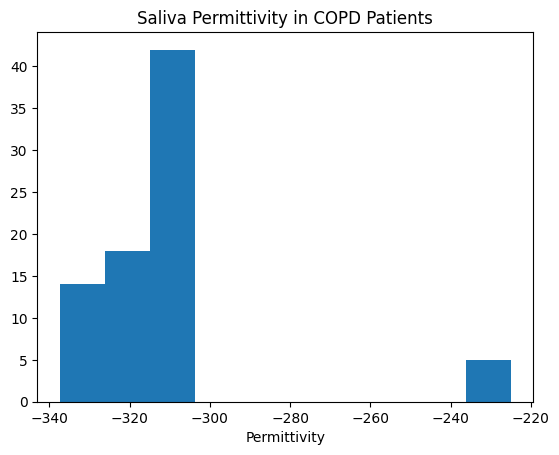

In [ ]:
plt.hist(copd_df_copd1["imaginary_min"])
plt.title('Saliva Permittivity in COPD Patients')
plt.xlabel('Permittivity')
plt.show()

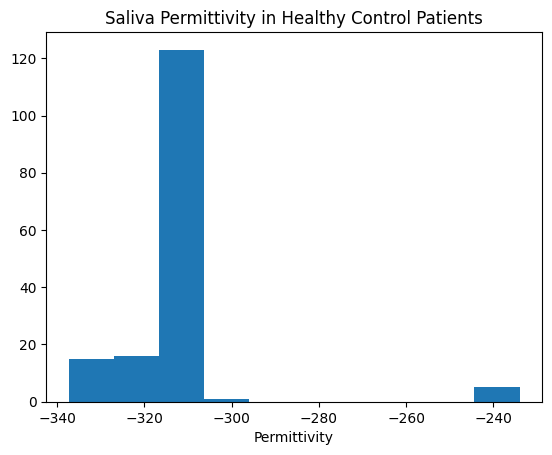

In [ ]:
plt.hist(copd_df_hc1["imaginary_min"])
plt.title('Saliva Permittivity in Healthy Control Patients')
plt.xlabel('Permittivity')
plt.show()

<Axes: >

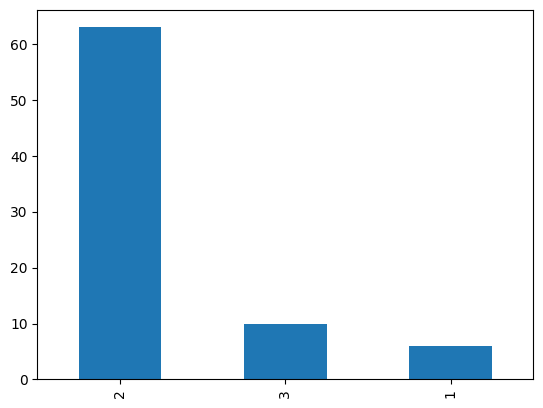

In [ ]:
copd_df_copd1['Smoking'].value_counts().plot(kind='bar') # smoking status counts for COPD patients

<Axes: >

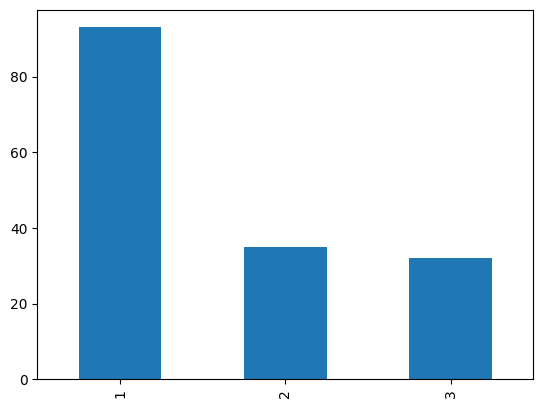

In [ ]:
copd_df_hc1['Smoking'].value_counts().plot(kind='bar')

In [ ]:
# Part 2 - Machine Learning Training and Testing, completed in R studio, please see R code

In [ ]:
copd_df3

,Diagnosis,imaginary_min,Gender,Age,Smoking
0,COPD,-320.61000,1,77,2
1,COPD,-325.39000,0,72,2
2,COPD,-323.00000,1,73,3
3,COPD,-327.78000,1,76,2
4,COPD,-325.39000,0,65,2
...,...,...,...,...,...
234,HC,-313.45925,0,49,2
235,HC,-313.45925,0,37,1
236,HC,-313.45925,0,29,1
237,HC,-313.45925,1,51,1


In [ ]:
copd_df3.to_csv('copd_clean.csv', index = False)
copd_df3.to_csv('/content/drive/My Drive/HI2454/copd_clean.csv', index = False)

In [ ]:
copd_df4.to_csv('copd_clean_1.csv', index = False)
copd_df4.to_csv('/content/drive/My Drive/HI2454/copd_clean_1.csv', index = False)